<img style="float:right" src="https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true" alt="Insper">


# Programa Avançado em Data Science e Decisão [»](https://www.insper.edu.br/pos-graduacao/programas-avancados/data-science-e-decisao/)
## Insper - Data Science Deploy

<h3 style="color:brown">Functions<h3>

 Function-as-a-Service (FaaS)

O Cloud Functions (Cloud Run Functions) é uma função como serviço (FaaS) sem servidor, totalmente gerenciada e orientada a eventos. Trata-se de um pequeno trecho de código executado em resposta a um evento, principalmente HTTP. Por ser totalmente gerenciado, os desenvolvedores e cientistas de dados podem simplesmente escrever o código e implantá-lo sem se preocupar em gerenciar os servidores (VM, Container) ou aumentar/diminuir a escala em função de picos de tráfego, que pode ser configura a ZERO. FaaS também é totalmente integrado ao Cloud Operations para observabilidade e diagnóstico. O Cloud Functions é baseado em uma estrutura FaaS de código aberto, o que facilita a migração e a depuração local. Podemos criar as functions com Python Flask e fazer deploy a partir de imagens (Docker Hub ou Google Container Registry - GCR - [Artifact Registry](https://cloud.google.com/artifact-registry/docs)) ou pelo código no GitHub.<br>
FaaS é o tipo de serviço em nuvem de mais alto nível, que roda sobre containers (Docker).

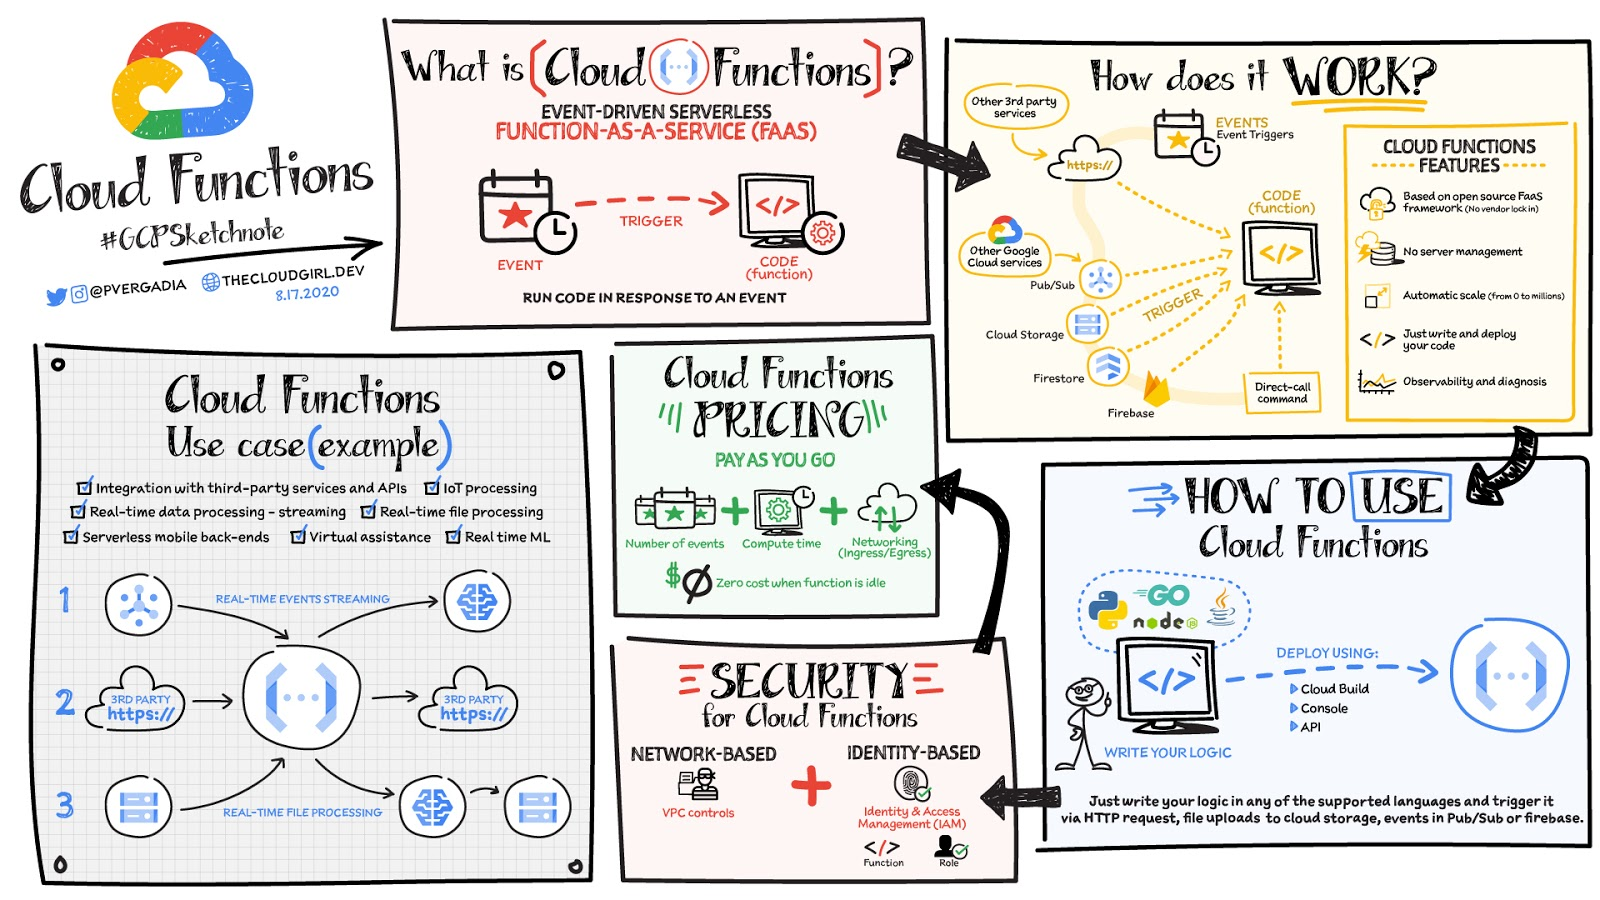

https://cloud.google.com/blog/topics/developers-practitioners/learn-cloud-functions-snap

Referências:

- https://reviewnprep.com/blog/aws-lambda-vs-azure-functions-vs-google-cloud-functions/
- https://cloud.google.com/hosting-options/